# Amplitude of the anomalous magnetic field

This code illustrates the dependence of the amplitude of the anomalous magnetic field on the magnetization of the sources.

### Note

This is an IPython notebook, a document that incorporates text, results, figures, and the Python source code to produce them. If you are viewing this from the URL http://nbviewer.ipython.org/, the document will be static (not executable). To run the code, you will need to download the notebook and install the software required. To do it, I recommend the [Anaconda](http://continuum.io/downloads), which is a completely free Python distribution.

These numerical tests use the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://fatiando.org/).

In [2]:
%matplotlib inline
import numpy as np
from IPython.display import Image
from fatiando import gridder
from fatiando.mesher import Prism, PointGrid
from fatiando.gridder import regular
from fatiando.gravmag import prism, sphere
from fatiando.gravmag.eqlayer import EQLTotalField
from fatiando.inversion.regularization import Damping
from fatiando.vis import mpl, myv
from fatiando.utils import ang2vec, gaussian2d
from fatiando.constants import G, CM, T2NT, SI2EOTVOS, SI2MGAL
mpl.rc('font', size=14)

### Synthetic model formed by two rectangular prisms

The two cells below generate a sinthetic source formed by two prisms with the same magnetization. The prisms have two possible magnetizations, according to the following table:

|                                       | magnetization 1 | magnetization 2 |
|:------------------------------------- |:---------------:|:---------------:|
| intensity $\left( A/m \right)$        |  10.0           |    14.0         |
| inclination $\left( ^{\circ} \right)$ |   5.0           |    30.0         |
| declination $\left( ^{\circ} \right)$ | -10.0           |    -3.0         |

In [3]:
ms = [10., 14.]
incs = [5., 70.]
decs = [-10., -3.0]

In [4]:
models = []

for i in range(len(ms)):
    models.append([Prism(16000, 18000, 15000, 17000, 50, 2000, 
                         props={'magnetization': ang2vec(ms[i],incs[i],decs[i])}),
                   Prism(13000, 15000, 16000, 22000, 100, 2100, 
                         props={'magnetization': ang2vec(ms[i],incs[i],decs[i])})])

# projection of the prisms on the xy plane
model_projection = []
for i, p in enumerate(models[0]):
    model_projection.append(p.get_bounds()[:4])

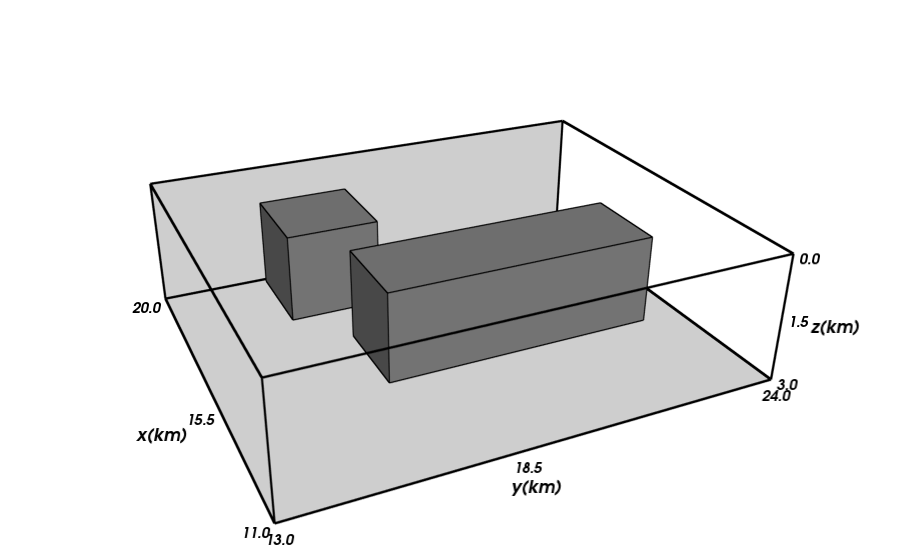

In [5]:
bounds = [11000, 20000, 13000, 24000, 0, 3000]
scene = myv.figure(size=(900, 600))
myv.prisms(models[0], color=(0.5, 0.5, 0.5), linewidth=1)
ax = myv.axes(myv.outline(extent=bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x(km)', 'y(km)', 'z(km)'
ax.axes.font_factor = 1.2
myv.wall_north(bounds)
myv.wall_bottom(bounds)

scene.scene.camera.position = [-2974.044752691183, 9596.8491056416624, -9107.8613821350282]
scene.scene.camera.focal_point = [15499.999999999958, 18499.999999999975, 1499.9999999999964]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.4184422264314937, 0.18994873005862808, -0.88815853488449303]
scene.scene.camera.clipping_range = [10100.563022901464, 39493.538959289974]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.savefig('magnetic-source.png')
myv.show()
Image(filename='magnetic-source.png')

Synthetic prisms forming the magnetic source.

### Observation points

In [6]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
area = [0, 30000, 5000, 35000] 

#number of data along the y and x directions
shape = (90,90)

#total number of data
N = shape[0]*shape[1]

#grid spacing along the y and x directions
dy, dx = gridder.spacing(area, shape)

#element of area used in the numerical integration
DS = dy*dx

#coordinates x and y of the data
xp, yp = regular(area, shape)

#vertical coordinates of the data
zp = -550. - 700.*gaussian2d(xp, yp, 20000, 10000, 12500, 22500, angle=45)

In [7]:
print 'Grid spacing along the y and x directions'
print 'dx = %.5f m | dy = %.5f m' % (dx,dy)
print 'Element of area used in the numerical integration'
print 'DS = %.2f m**2' % DS

Grid spacing along the y and x directions
dx = 337.07865 m | dy = 337.07865 m
Element of area used in the numerical integration
DS = 113622.02 m**2


In [8]:
print '    maximum  |  minimum'
print 'zp', ' %7.2f  | %7.2f' % (np.max(zp), np.min(zp))

    maximum  |  minimum
zp  -551.31  | -1249.99


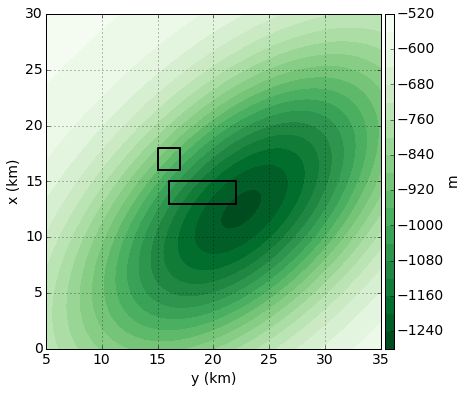

In [9]:
mpl.close('all')
mpl.figure(figsize=(8, 6))
mpl.axis('scaled')
ranges = np.abs([zp.max(), zp.min()]).max()
#mpl.contourf(yp, xp, zp, shape, 20, cmap=mpl.cm.Greys_r, vmin=-ranges, vmax=ranges)
mpl.contourf(yp, xp, zp, shape, 20, cmap=mpl.cm.Greens_r)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('m')
for i, sq in enumerate(model_projection):
    mpl.square(sq, style='-k', linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
#mpl.savefig('data-surface.png', pad_inches=0.0)

Surface containing the calculated amplitude of the anomalous magnetic field.

### Amplitude of the anomalous magnetic field (AMF)

In [10]:
Bx = [] # x component of the magnetic induction
By = [] # y component of the magnetic induction
Bz = [] # z component of the magnetic induction
AMF = [] # amplitude of the anomalous magnetic field
for i in range(len(ms)):
    Bx.append(prism.bx(xp,yp,zp,models[i]))
    By.append(prism.by(xp,yp,zp,models[i]))
    Bz.append(prism.bz(xp,yp,zp,models[i]))
    AMF.append(np.sqrt(Bx[i]**2 + By[i]**2 + Bz[i]**2))

c:\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


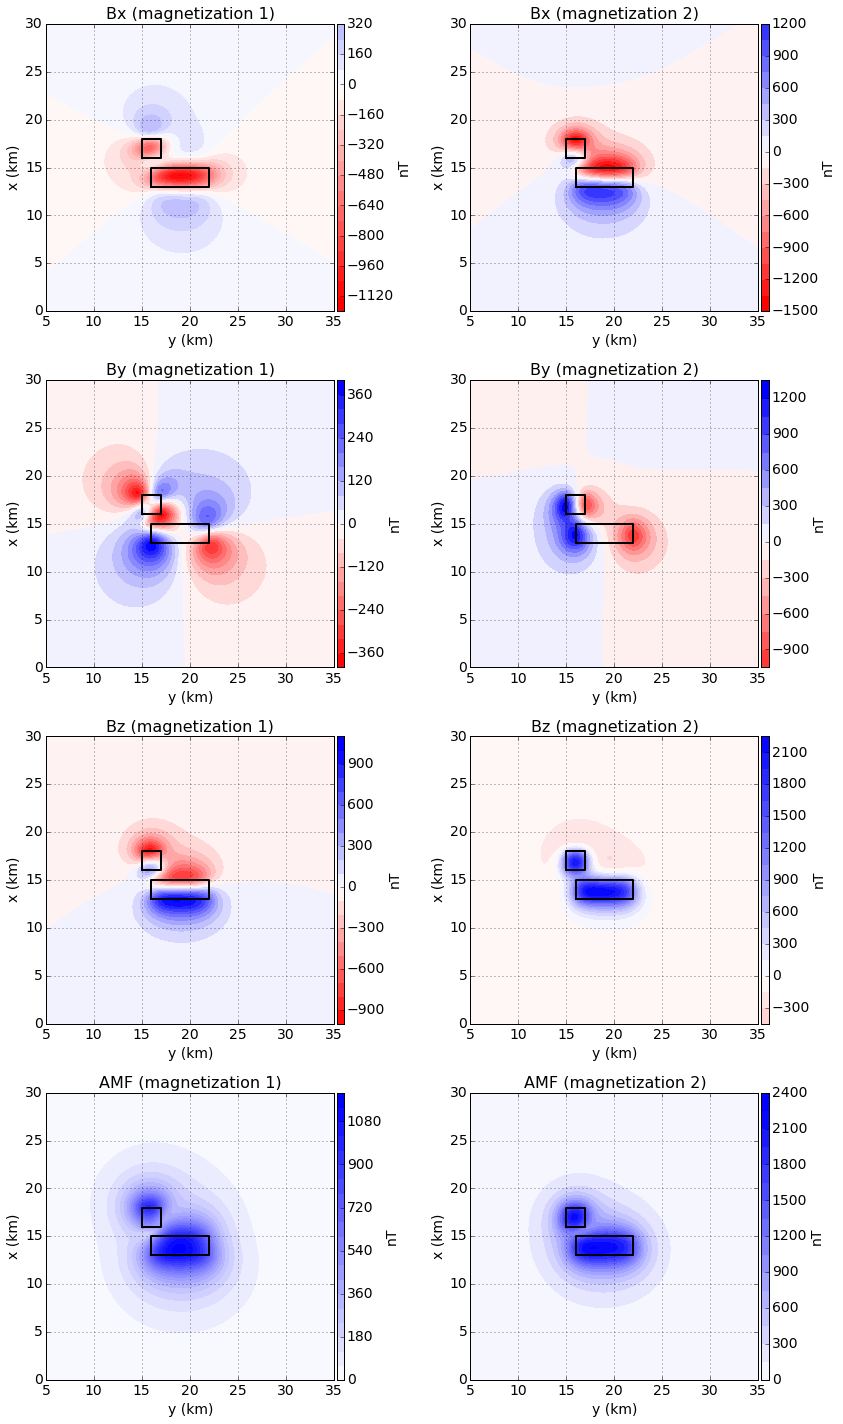

In [11]:
titlesize=16

mpl.figure(figsize=(12, 20), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(4,2,1)
ranges = np.abs([Bx[0].max(), Bx[0].min()]).max()
mpl.title('Bx (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, Bx[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,2)
ranges = np.abs([Bx[1].max(), Bx[1].min()]).max()
mpl.title('Bx (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, Bx[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,3)
ranges = np.abs([By[0].max(), By[0].min()]).max()
mpl.title('By (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, By[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,4)
ranges = np.abs([By[1].max(), By[1].min()]).max()
mpl.title('By (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, By[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
    
mpl.subplot(4,2,5)
ranges = np.abs([Bz[0].max(), Bz[0].min()]).max()
mpl.title('Bz (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, Bz[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,6)
ranges = np.abs([Bz[1].max(), Bz[1].min()]).max()
mpl.title('Bz (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, Bz[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,7)
ranges = np.abs([AMF[0].max(), AMF[0].min()]).max()
mpl.title('AMF (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(4,2,8)
ranges = np.abs([AMF[1].max(), AMF[1].min()]).max()
mpl.title('AMF (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

This Figure shows the components of the magnetic inducion and the AMF produced by the synthetic source. These magnetic data were calculated by considering the two possible magnetizations shown in the table previously presented. Note that the AMF (the last two plots) varies with the magnetization of the source.

###Estimating the AMF by using an equivalent layer that fits the total-field anomaly (TFA)

####Computation of the total-field anomaly produced by the magnetic source with two possible magnetizations

In [12]:
inc, dec = -23.4, -13.0 #inclination and declination of the local-geomagnetic field

Note that the local-gemagnetic field has a direction different from that ones of the magnetizations 1 and 2 shown in the table above.

In [13]:
TFA = []
for i in range(len(ms)):
    TFA.append(prism.tf(xp,yp,zp,models[i], inc, dec))

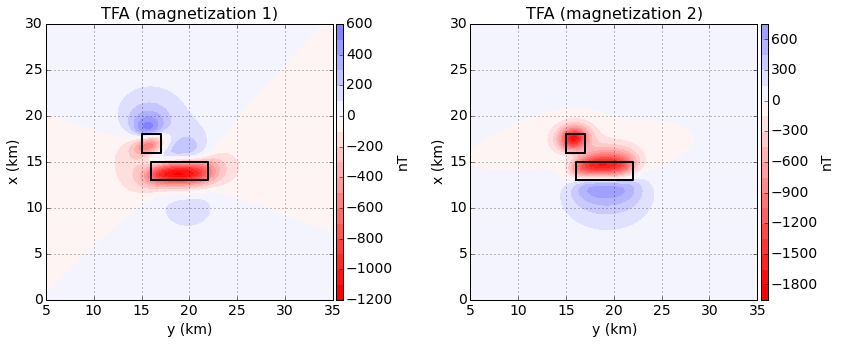

In [14]:
titlesize=16

mpl.figure(figsize=(12, 5), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(1,2,1)
ranges = np.abs([TFA[0].max(), TFA[0].min()]).max()
mpl.title('TFA (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, TFA[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(1,2,2)
ranges = np.abs([TFA[1].max(), TFA[1].min()]).max()
mpl.title('TFA (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, TFA[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

Total-field anomalies produced by the magnetic source. The TFAs were calculated by considering the two possible magnetizations shown in the previously presented table.

####Setting two equivalent layers

In [15]:
h = np.max(zp) + 1.4*dx
print 'h = %.3f m' % h

layers = [PointGrid(area, h, shape),
          PointGrid(area, h, shape)]

h = -79.397 m


####Estimating the magnetization intensity distributions

In this test, the equivalent layer technique is applied to interpret the two TFA data sets, which are calculated with magnetization 1 and magnetization 2 (see the table shown above). The equivalent layer applied to the TFA calculated with magnetization 1 is formed by equivalent sources with magnetization direction aligned with the magnetization 1. The equivalent layer applied to the TFA calculated with magnetization 2 is formed by equivalent sources with magnetization direction aligned with the local-geomagnetic field, which is different from that one of the magnetization 2.

In [16]:
misfits = [EQLTotalField(xp, yp, zp, TFA[0], inc, dec, layers[0], sinc=incs[0], sdec=decs[0]),
           EQLTotalField(xp, yp, zp, TFA[1], inc, dec, layers[1], sinc=inc, sdec=dec)]

In [17]:
regul = Damping(layers[0].size)

In [18]:
solvers = [(misfits[0] + (10**-20)*regul).fit(),
           (misfits[1] + (10**-20)*regul).fit()]

In [19]:
residuals = [solvers[0].residuals(),
             solvers[1].residuals()]

In [20]:
layers[0].addprop('magnetization', ang2vec(solvers[0].estimate_, incs[0], decs[0]))
layers[1].addprop('magnetization', ang2vec(solvers[1].estimate_, inc, dec))

In [21]:
print "Residuals 1"
print "mean:   %6.3f nT" % residuals[0].mean()
print "stddev: %6.3f nT" % residuals[0].std()
print '\n'
print "Residuals 2"
print "mean:   %6.3f nT" % residuals[1].mean()
print "stddev: %6.3f nT" % residuals[1].std()

Residuals 1
mean:   -0.011 nT
stddev:  0.037 nT


Residuals 2
mean:   -0.036 nT
stddev:  1.921 nT


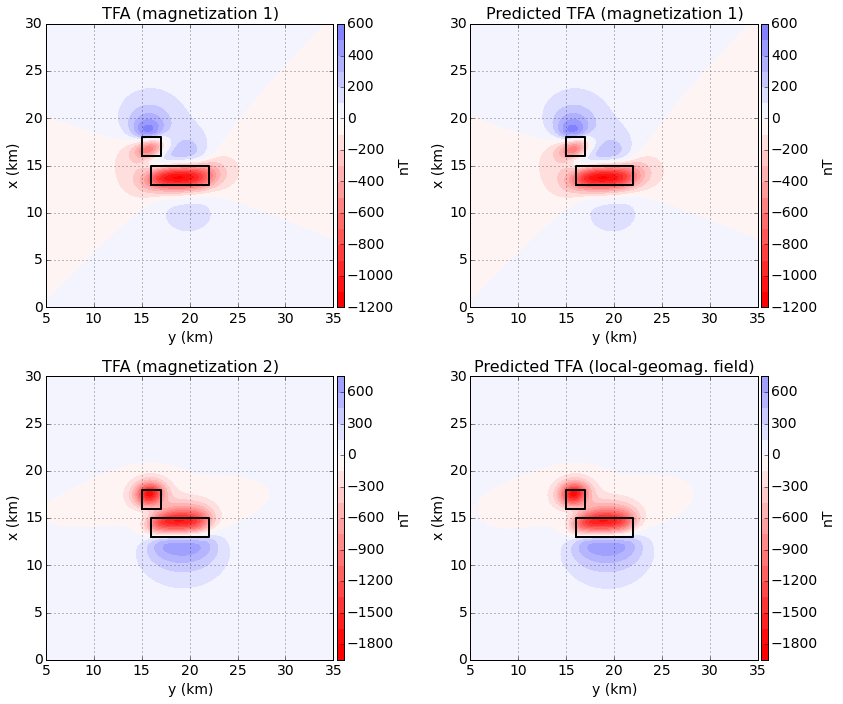

In [22]:
titlesize=16

mpl.figure(figsize=(12, 10), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(2,2,1)
ranges = np.abs([TFA[0].max(), TFA[0].min()]).max()
mpl.title('TFA (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, TFA[0], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,2)
ranges = np.abs([solvers[0].predicted().max(), solvers[0].predicted().min()]).max()
mpl.title('Predicted TFA (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, solvers[0].predicted(), shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,3)
ranges = np.abs([TFA[1].max(), TFA[1].min()]).max()
mpl.title('TFA (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, TFA[1], shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,4)
ranges = np.abs([solvers[1].predicted().max(), solvers[1].predicted().min()]).max()
mpl.title('Predicted TFA (local-geomag. field)', fontsize=titlesize)
mpl.contourf(yp, xp, solvers[1].predicted(), shape, 20, cmap=mpl.cm.bwr_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

Comparison between the true TFAs produced by the synthetic source with different magnetizations and the TFAs produced by the equivalent layers.

####Calculating the AMF

In [23]:
Bx_pre = [] # x component of the magnetic induction
By_pre = [] # y component of the magnetic induction
Bz_pre = [] # z component of the magnetic induction
AMF_pre = [] # amplitude of the anomalous magnetic field
for i in range(len(ms)):
    Bx_pre.append(sphere.bx(xp,yp,zp,layers[i]))
    By_pre.append(sphere.by(xp,yp,zp,layers[i]))
    Bz_pre.append(sphere.bz(xp,yp,zp,layers[i]))
    AMF_pre.append(np.sqrt(Bx_pre[i]**2 + By_pre[i]**2 + Bz_pre[i]**2))

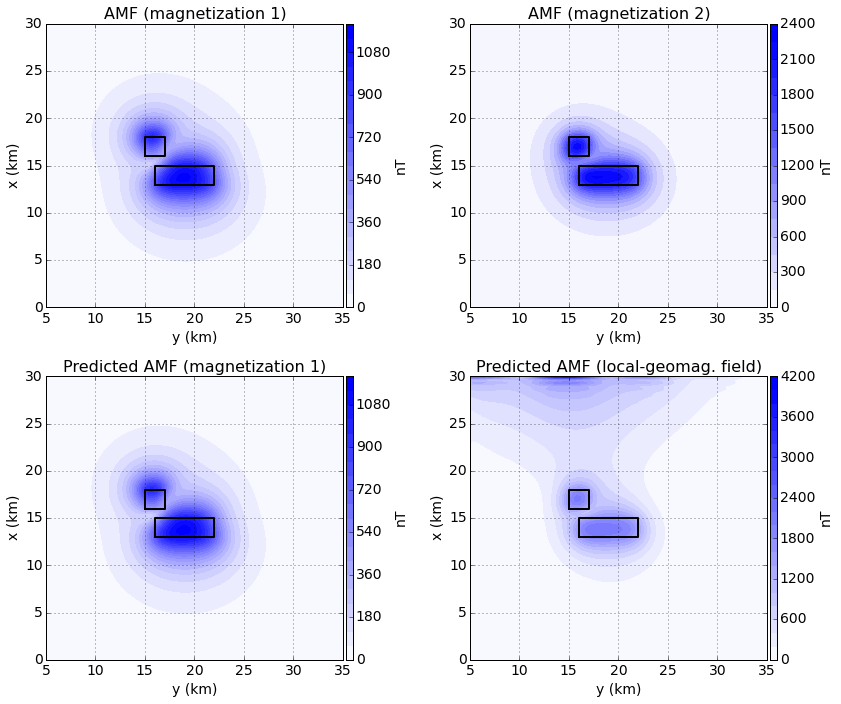

In [25]:
titlesize=16

mpl.figure(figsize=(12, 10), tight_layout=True)
mpl.axis('scaled')

mpl.subplot(2,2,1)
ranges = np.abs([AMF[0].max(), AMF[0].min()]).max()
mpl.title('AMF (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF[0], shape, 20, cmap=mpl.cm.bwr_r,
             vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,2)
ranges = np.abs([AMF[1].max(), AMF[1].min()]).max()
mpl.title('AMF (magnetization 2)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF[1], shape, 20, cmap=mpl.cm.bwr_r,
             vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,3)
ranges = np.abs([AMF_pre[0].max(), AMF_pre[0].min()]).max()
mpl.title('Predicted AMF (magnetization 1)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF_pre[0], shape, 20, cmap=mpl.cm.bwr_r,
             vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

mpl.subplot(2,2,4)
ranges = np.abs([AMF_pre[1].max(), AMF_pre[1].min()]).max()
mpl.title('Predicted AMF (local-geomag. field)', fontsize=titlesize)
mpl.contourf(yp, xp, AMF_pre[1], shape, 20, cmap=mpl.cm.bwr_r,
             vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
for i, sq in enumerate(model_projection):
    mpl.square(sq, linewidth=2.0, xy2ne=True)
mpl.m2km()
mpl.grid()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')

As we can see, the AMF (Predicted AMF - magnetization 1) calculated by using an equivalent layer formed by equivalent sources with the same magnetization direction as that one of the true magnetic source is able to reproduce the true AMF (AMF - magnetization 1). On the other hand, the AMF (Predicted AMF - local-geomag. field) produced by the equivalent layer formed by equivalent sources with magnetization direction different from that one of the true magnetic source is not able to reproduce the true AMF (AMF - magnetization 2). This result shows that the computation of the AMF by using the equivalent layer technique requires the knowledge of the magnetization direction of the true magnetic source. 